## 2D Material Detection 

For training on 2D material images, DetectoRS algorithm is chosen with Cascade+ResNet-50 as the backbone detector architecture implemented in MMDetection library.


### Installation 

In [ ]:
# install dependencies
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
!pip install mmcv-full==1.6.0 -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html # the above line install the latest version, and after some time using the latest version, I one day recieved an error that i should reduce the version of mmcv to be compatible

# install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.2 MB/s eta 0:16:49tcmalloc: large alloc 1147494400 bytes == 0x399f2000 @  0x7fb89851b615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████▌               | 1055.7 MB 1.2 MB/s eta 0:13:40tcmalloc: large alloc 1434370048 bytes == 0x7e048000 @  0x7fb89851b615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████

In [ ]:
#### Check the Installation 
from mmcv import collect_env
collect_env()

# Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# MMDetection installation
import mmdet
print(mmdet.__version__)

# mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 True
2.25.1
11.1
GCC 7.3


### Data Import

In [ ]:
# pre-trained weights
import zipfile
with zipfile.ZipFile('/content/epoch18.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/epoch18/')
    
# MSU dataset
import zipfile
with zipfile.ZipFile('/content/sample_data/MonArk_BN_Modified_Classes.v6i.coco.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data/our_data/')

### Inference Results
#### Applying the trained model on three test dataset and ploting confusion matrix.


In [ ]:
# MSU test data
!mkdir /content/mat1 # creating a folder to save the confusion matrix 

!python tools/test.py /content/mmdetection/configs/my_custom_detectroRS_config.py /content/epoch18/epoch_18.pth --out /content/our_results1.pkl --show-dir /content/mat1
!python tools/analysis_tools/confusion_matrix.py /content/mmdetection/configs/my_custom_detectroRS_config.py /content/our_results1.pkl /content/mat1 --show 


mkdir: cannot create directory ‘/content/mat1’: File exists
/content/mmdetection/mmdet/utils/setup_env.py:39: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmdetection/mmdet/utils/setup_env.py:49: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
load checkpoint from local path: /content/epoch18/epoch_18.pth
[                                                  ] 0/10, elapsed: 0s, ETA:/usr/local/lib/python3.7/dist-packages

In [ ]:
# Masubuchi test data 

!mkdir /content/mat2 # creating a folder to save the confusion matrix 

with zipfile.ZipFile('/content/sample_data/Masubuchi_Object_Detection.v5i.coco.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data/Mas_data/')

!python tools/test.py /content/mmdetection/configs/my_custom_detectroRS_config_masubuchi.py /content/epoch18/epoch_18.pth --out /content/Mas_results1.pkl --show-dir /content/mat2
!python tools/analysis_tools/confusion_matrix.py /content/mmdetection/configs/my_custom_detectroRS_config_masubuchi.py /content/Mas_results1.pkl /content/mat2 --show


/content/mmdetection/mmdet/utils/setup_env.py:39: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmdetection/mmdet/utils/setup_env.py:49: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
load checkpoint from local path: /content/epoch18/epoch_18.pth
[                                                  ] 0/10, elapsed: 0s, ETA:/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and 

In [ ]:
# UA test data 

!mkdir /content/mat3 # creating a folder to save the confusion matrix 

with zipfile.ZipFile('/content/sample_data/UA_BN_Dataset.v5i.coco.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data/UA_data/')

!python tools/test.py /content/mmdetection/configs/my_custom_detectroRS_config_UA.py /content/epoch18/epoch_18.pth --out /content/UA_results1.pkl --show-dir /content/mat3
!python tools/analysis_tools/confusion_matrix.py /content/mmdetection/configs/my_custom_detectroRS_config_UA.py /content/UA_results1.pkl /content/mat3 --show


mkdir: cannot create directory ‘/content/mat3’: File exists
/content/mmdetection/mmdet/utils/setup_env.py:39: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmdetection/mmdet/utils/setup_env.py:49: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
load checkpoint from local path: /content/epoch18/epoch_18.pth
[                                                  ] 0/10, elapsed: 0s, ETA:/usr/local/lib/python3.7/dist-packages

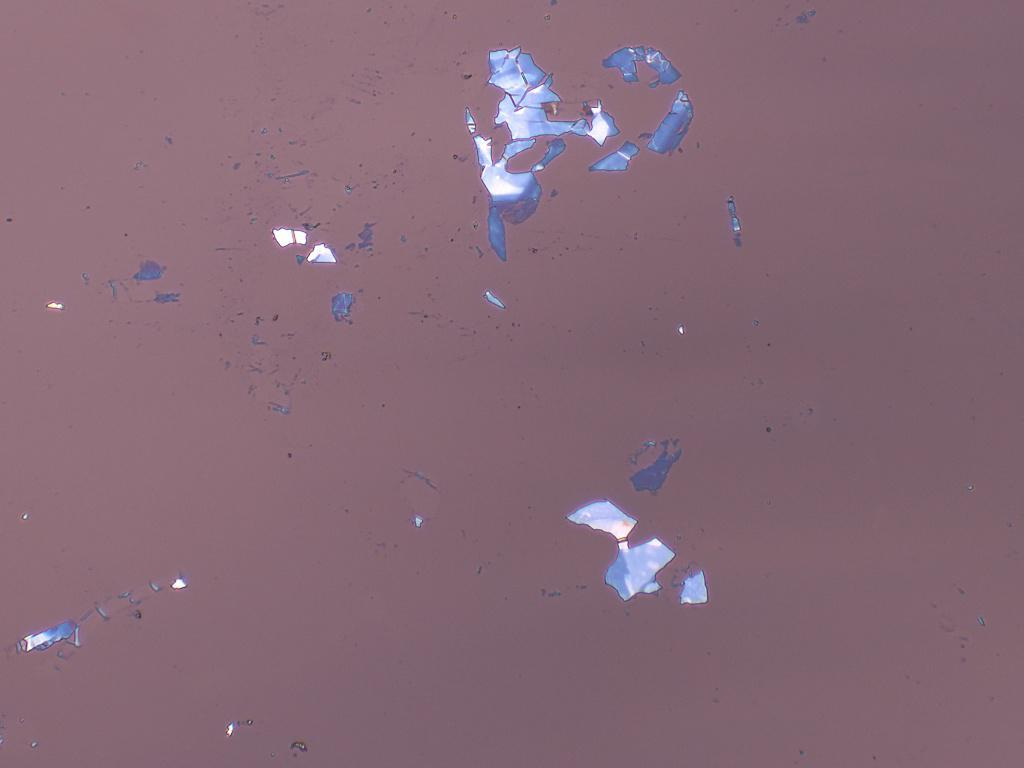

load checkpoint from local path: /content/epoch18/epoch_18.pth


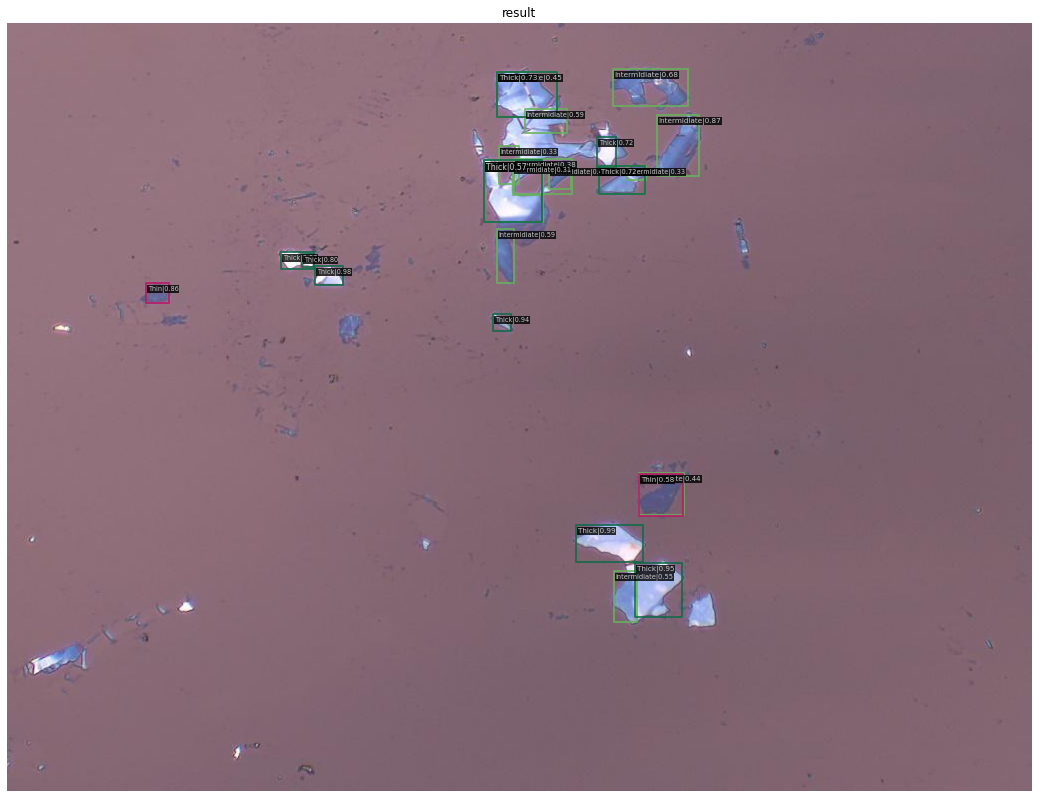

In [ ]:
# Visualization of the inference results 
import mmcv
from mmcv import Config
from mmcv.runner import load_checkpoint
from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector


# make the checkpoints
config_path='/content/mmdetection/configs/my_custom_detectroRS_config.py'
load_path='/content/epoch18/epoch_18.pth'

#load the config
cfg = Config.fromfile(config_path)  
cfg.load_from = load_path

# run detection for a single image from MSU test dataset
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
from google.colab.patches import cv2_imshow
from skimage.io import imread_collection

image=mmcv.imread('/content/sample_data/our_data/test/220324-hBN-on-100nm-SiO2-SP-1_17_jpg.rf.e66e6c2c19cc7bcaa8c0e2b8e6df781f.jpg')
cv2_imshow(image)

model = init_detector(cfg, load_path, device='cuda:0')
model.CLASSES=('Intermidiate','Thick','Thin') 
result = inference_detector(model, image)
show_result_pyplot(model, image, result) 


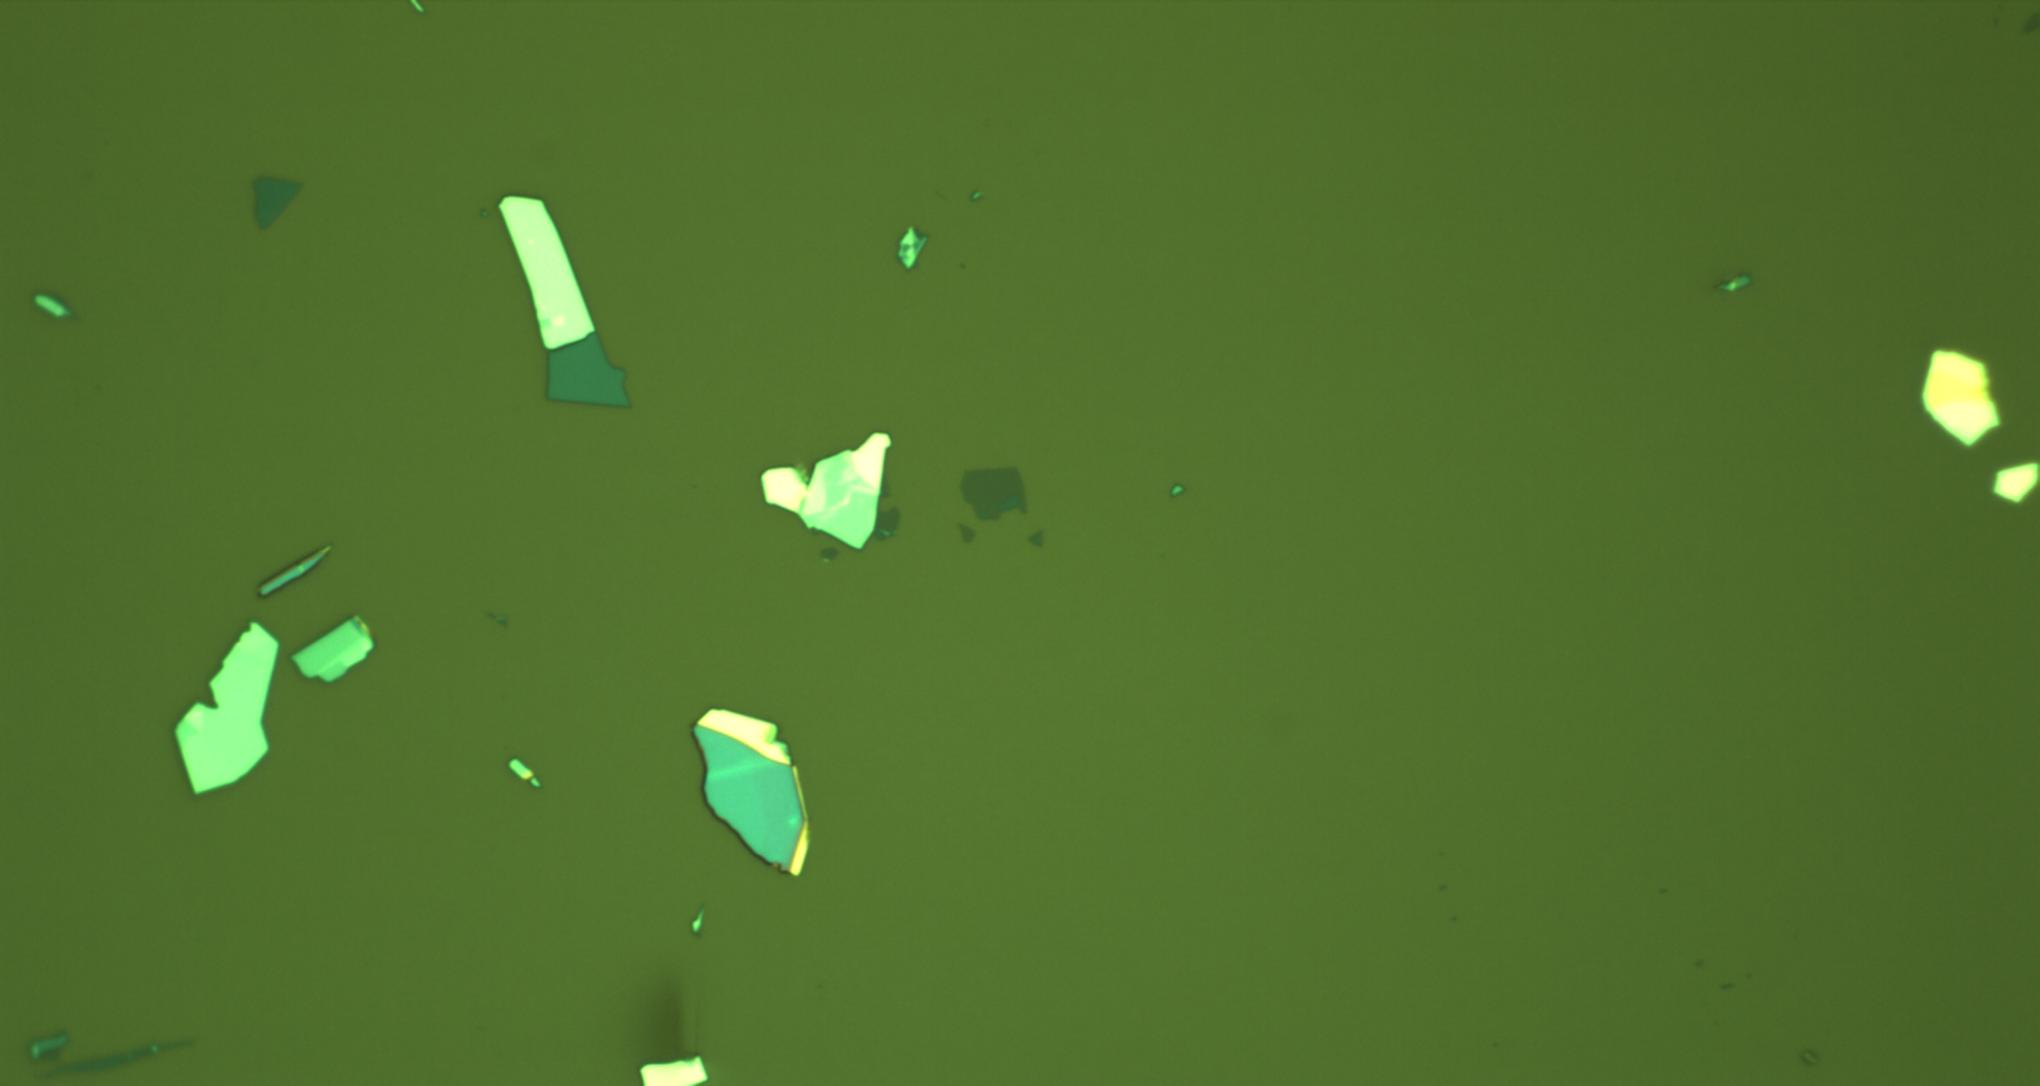

load checkpoint from local path: /content/epoch18/epoch_18.pth


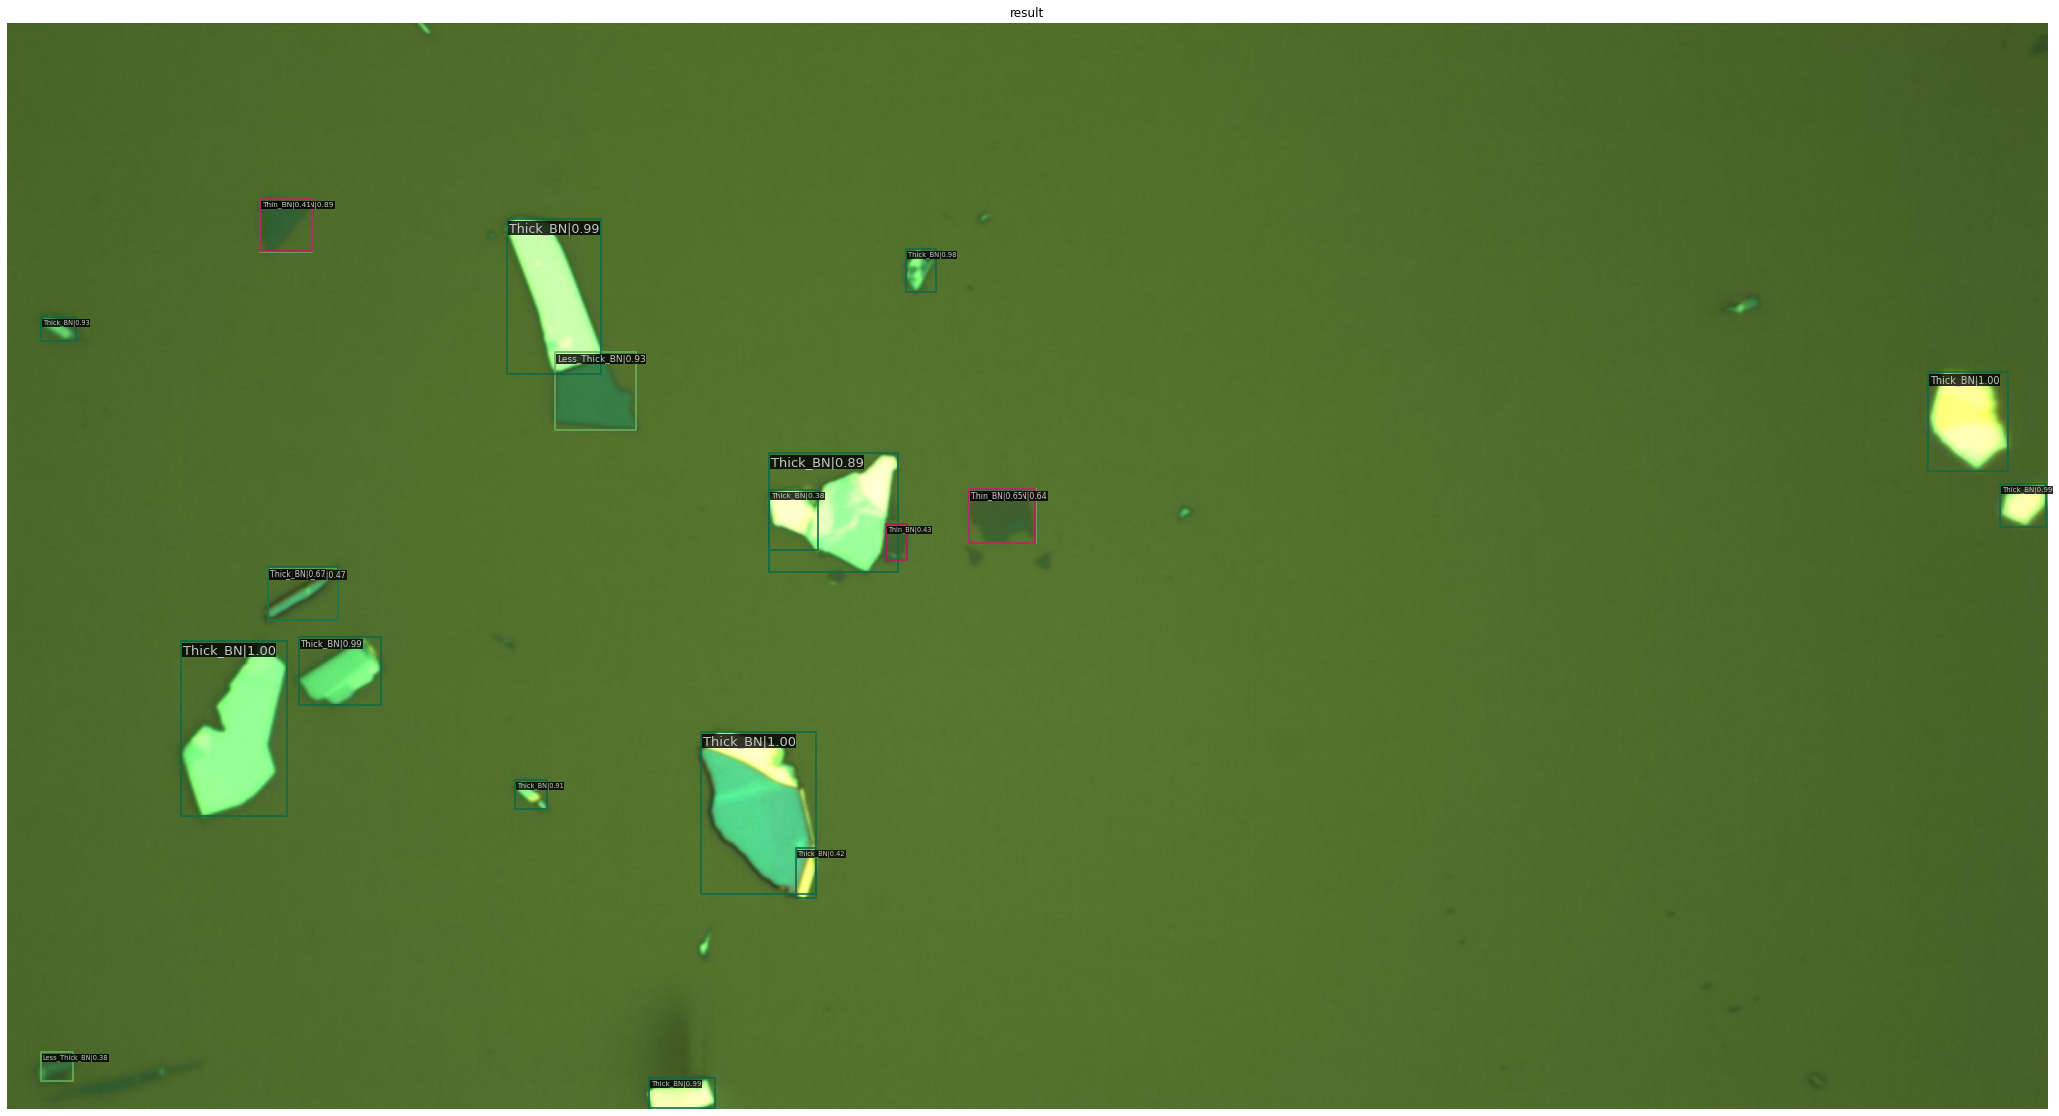

In [ ]:
# run detection for a single image from Masubuchi test dataset
image=mmcv.imread('/content/cjlyhoo9awjqq0714crlf57db%2F0db84a13-81ed-21e5-6098-ed387a64220b-0000000192_-000013067_0000012250_0000001497.jpg')
cv2_imshow(image)

model = init_detector(cfg, load_path, device='cuda:0')
result = inference_detector(model, image)
show_result_pyplot(model, image, result) 

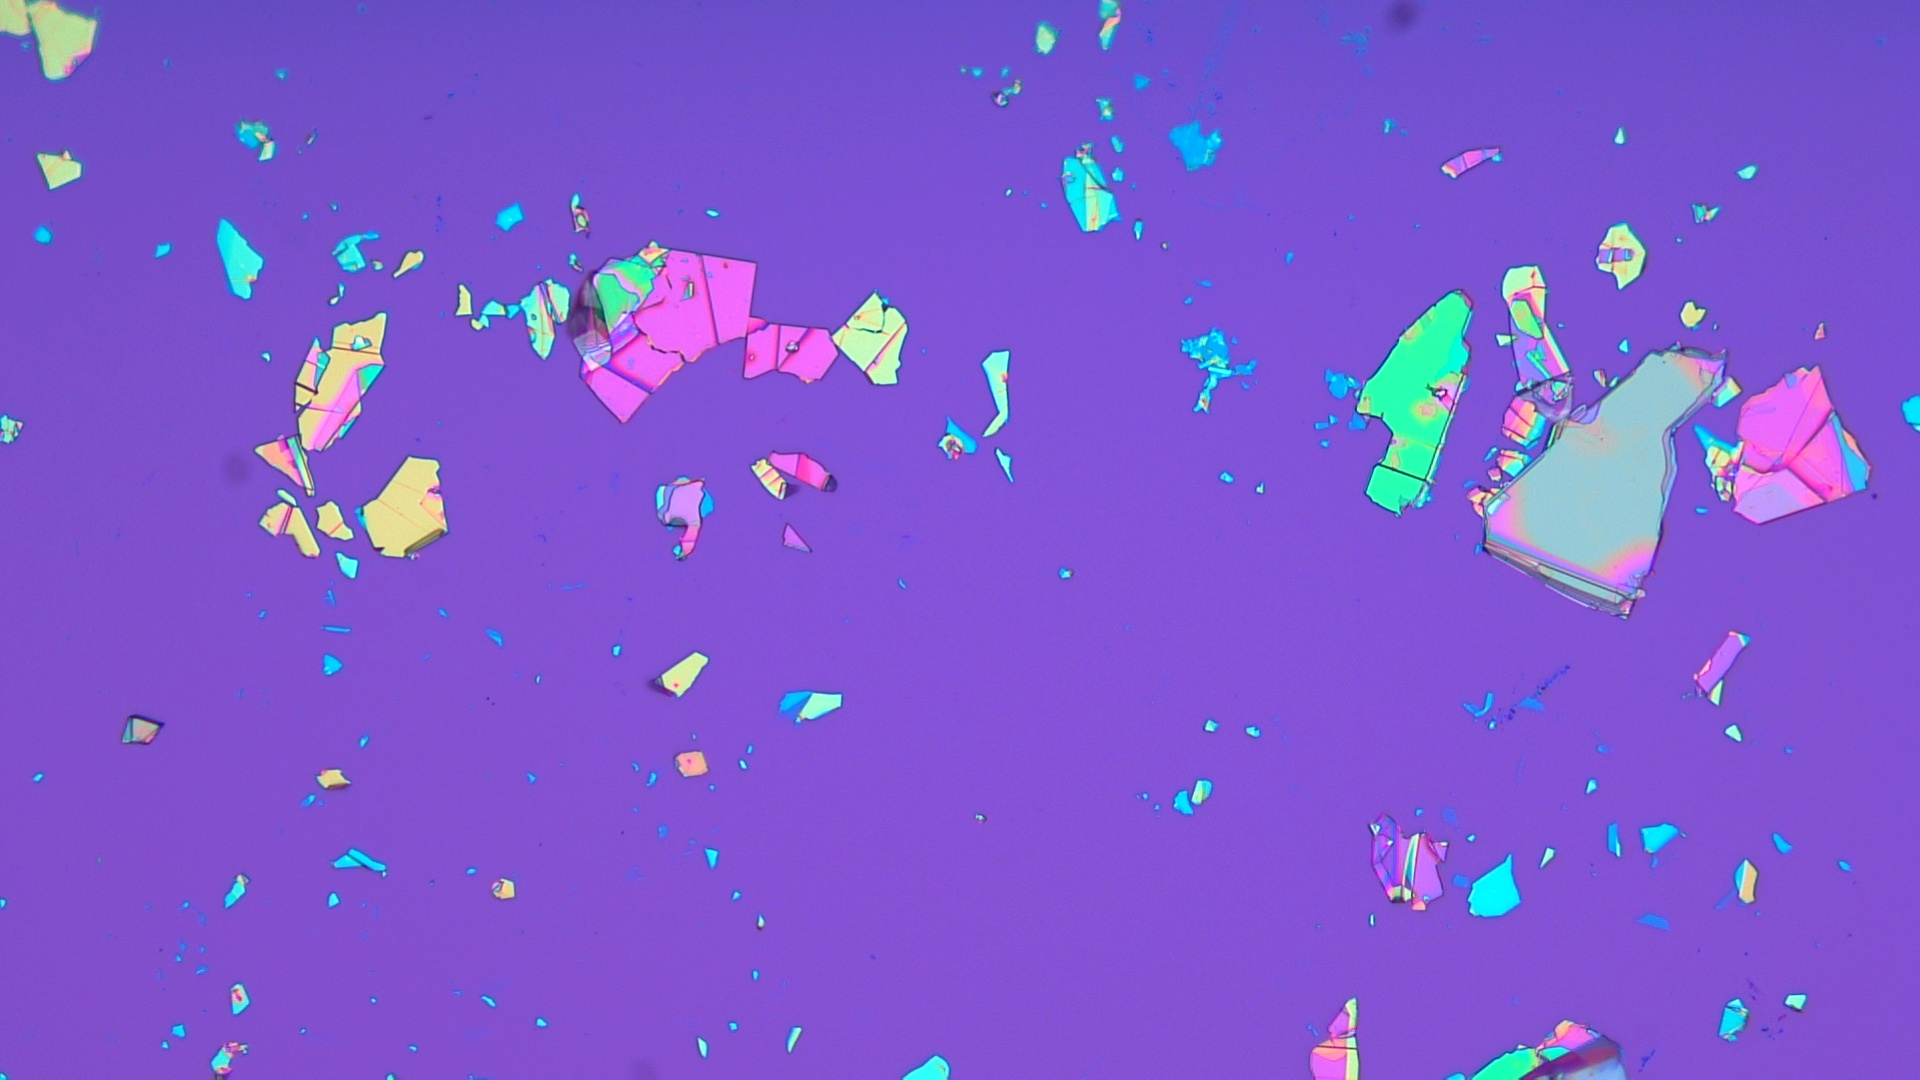

load checkpoint from local path: /content/epoch18/epoch_18.pth


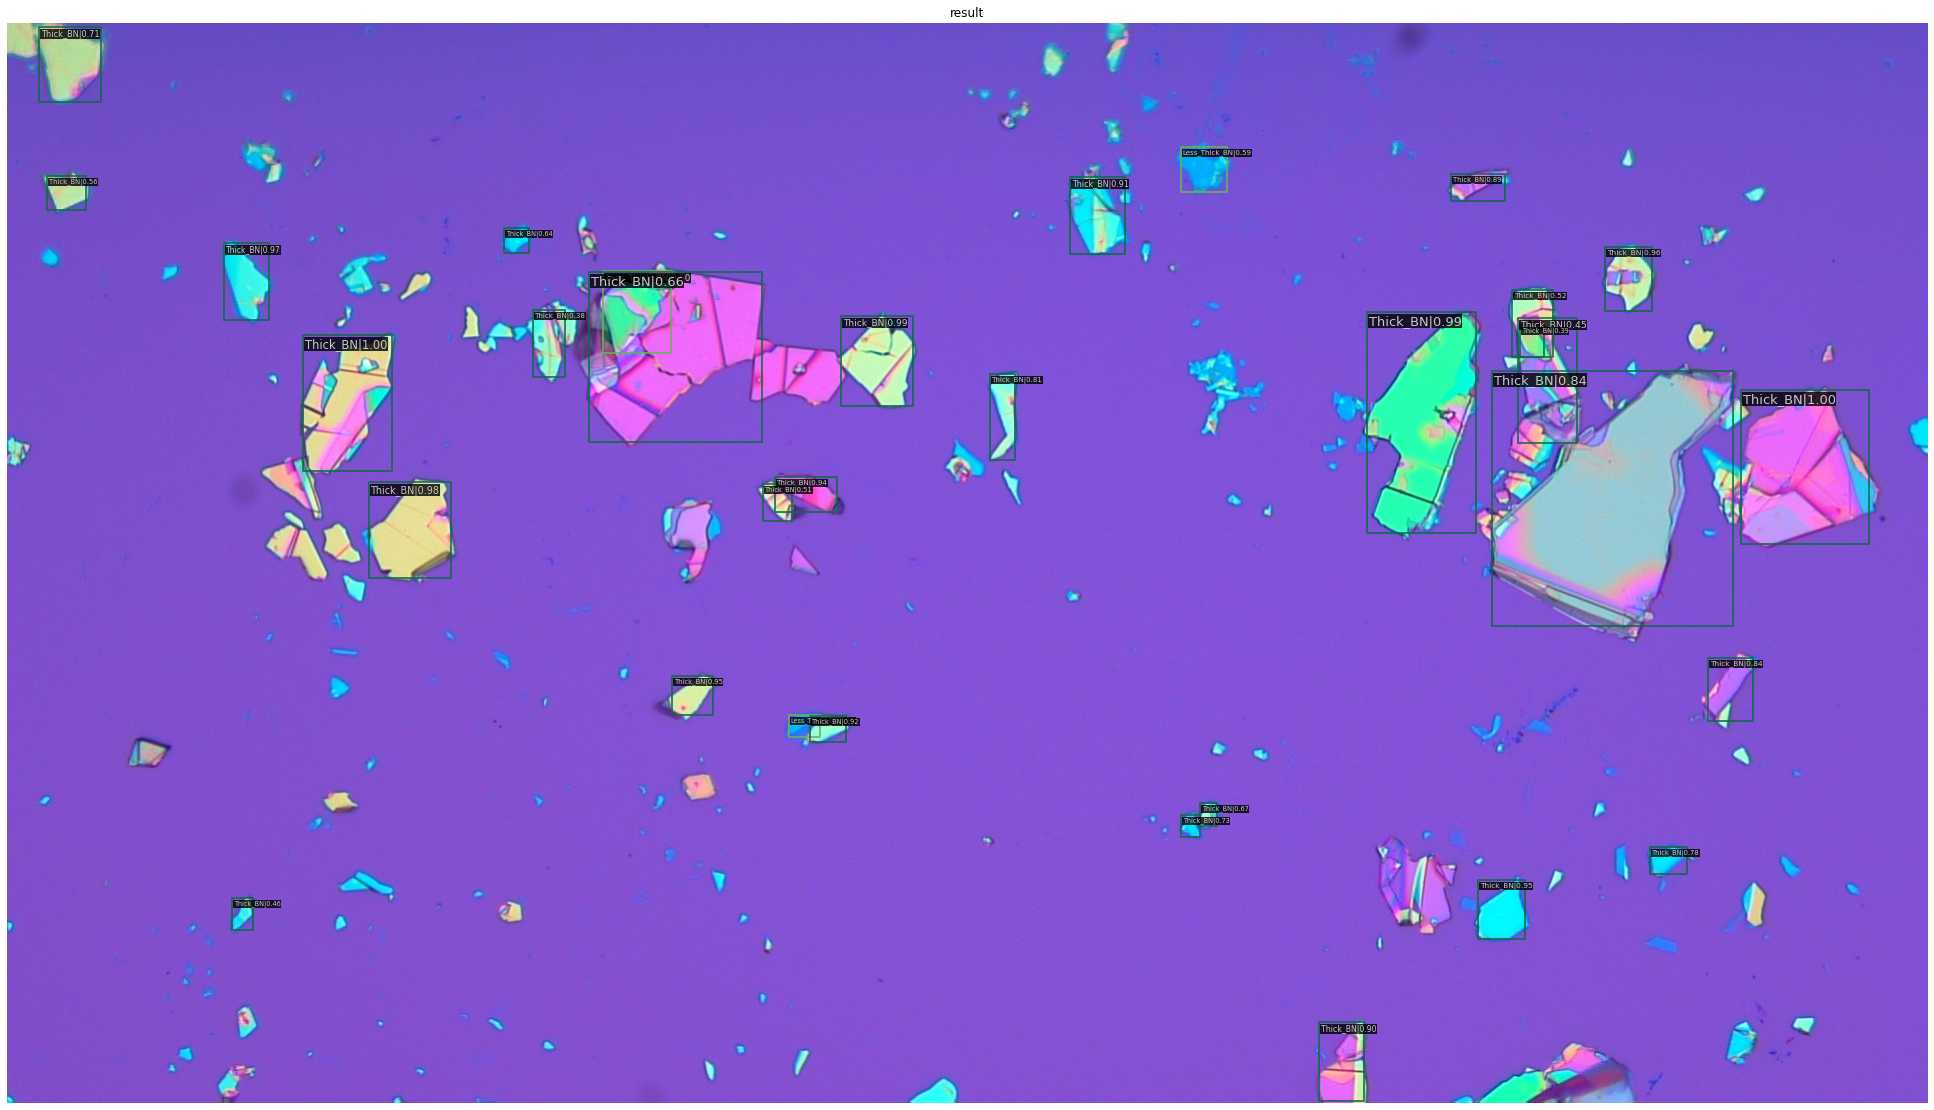

In [ ]:
# # run detection for a single image from UA test dataset
image=mmcv.imread('/content/3-081.jpg')
cv2_imshow(image)

model = init_detector(cfg, load_path, device='cuda:0')
result = inference_detector(model, image)
show_result_pyplot(model, image, result) 